# Description:

The Objective of the dataset is to predict Prices of Houses based on the other features provided. The dataset contains 18 Features that contains many descriptive information of the houses which is necessary to predict prices like bedrooms, bathrooms, bathrooms, sqft_above. These are some of the features available in the dataset which can be considered Directly Proportional to the target variable Price. By Using Various Machine Learning methods and Algorithms the Final Model will be designed. 

## Step 0 : Importing Libraries and Dataset 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing Dataset
data = pd.read_csv("data.csv")

## Step 1: Descriptive Statistics

In [4]:
#Previewing Data
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
#Checking number of rows and column in Dataset
data.shape

(4600, 18)

In [6]:
#Checking for data types of the column in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
# Analysing the Descriptive Statistics of the Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [8]:
#Checking for Missing Values in the Data
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Observations:
1. There are Total 4600 records and 18 Features in the Dataset.
2. The are in int, Float and Object Datatype.
3. There are no NaN values in the Dataset.
4. The price is the Target variable in the Dataset.

## Step 2: Data Visualization

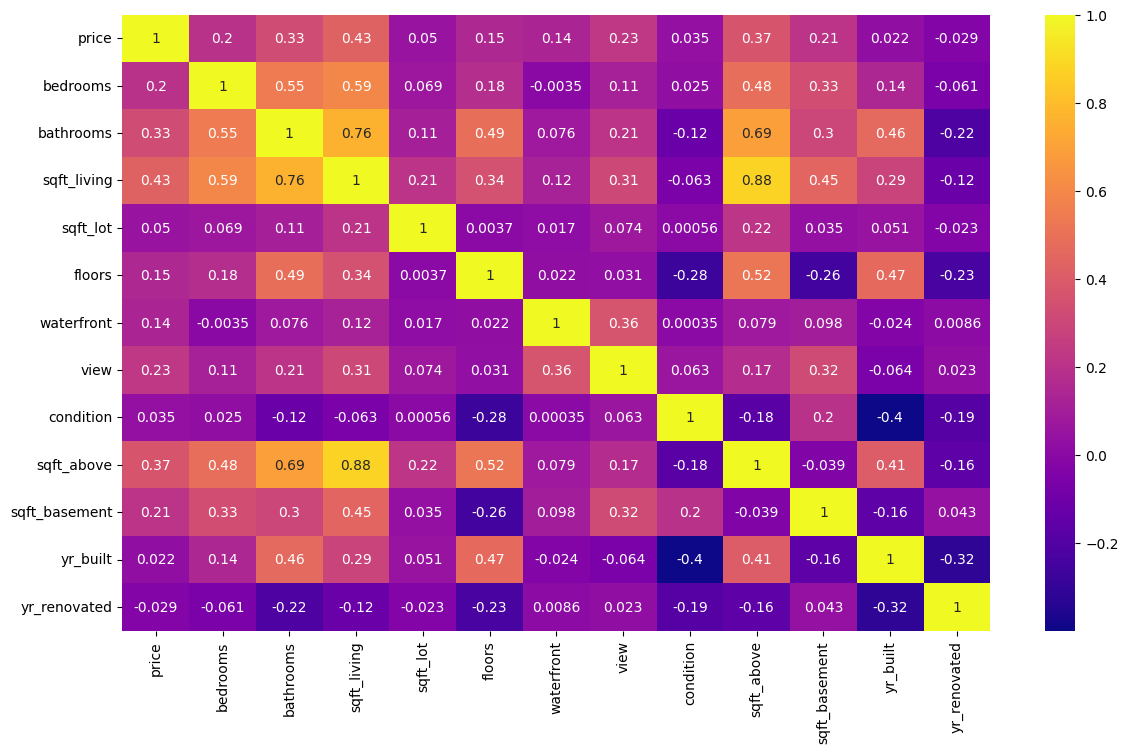

In [61]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap='plasma')
plt.show()

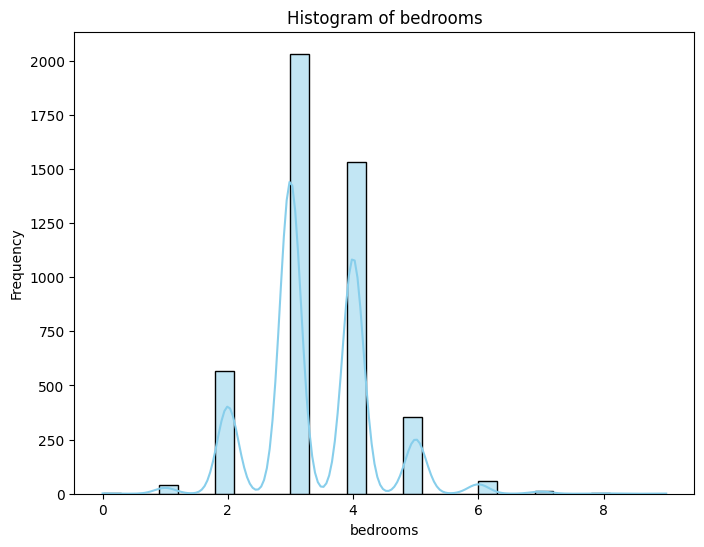

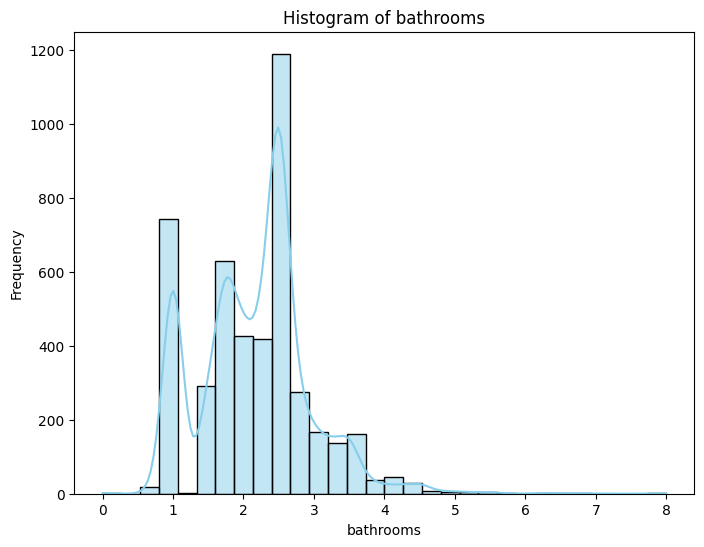

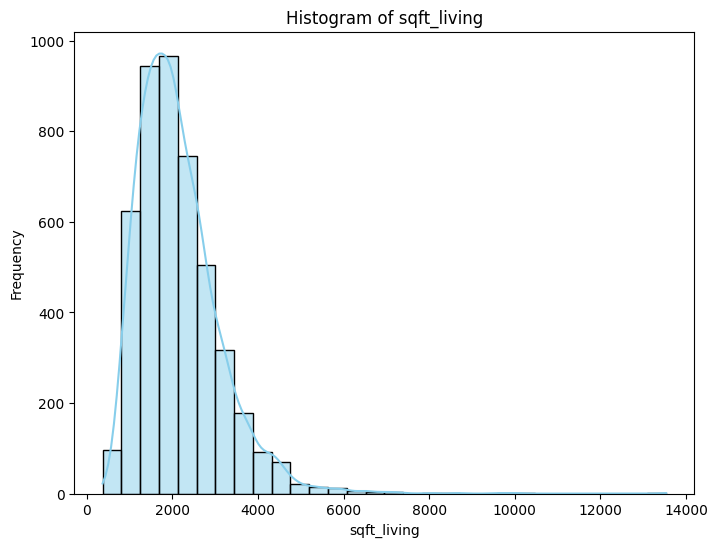

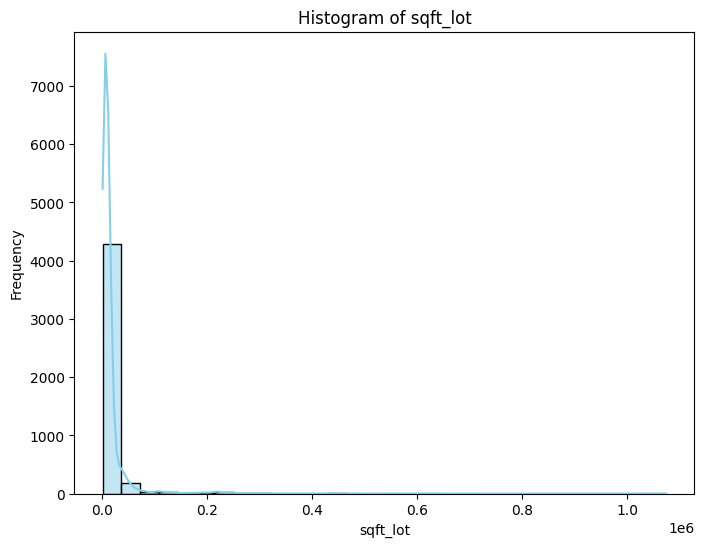

In [10]:
# Histograms for numerical features
numerical_features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot"]
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

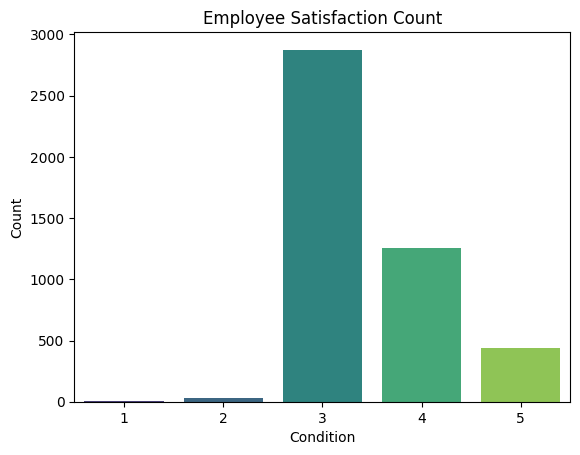

In [11]:
sns.countplot(x='condition', data=data, palette='viridis')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Employee Satisfaction Count')
plt.show()

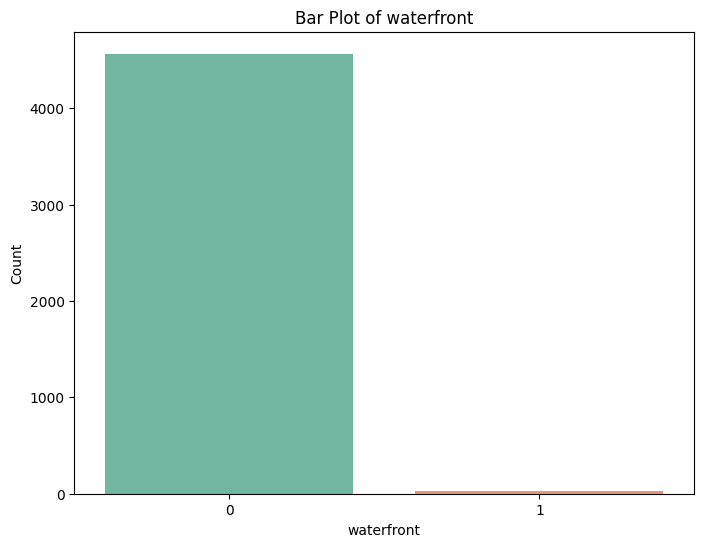

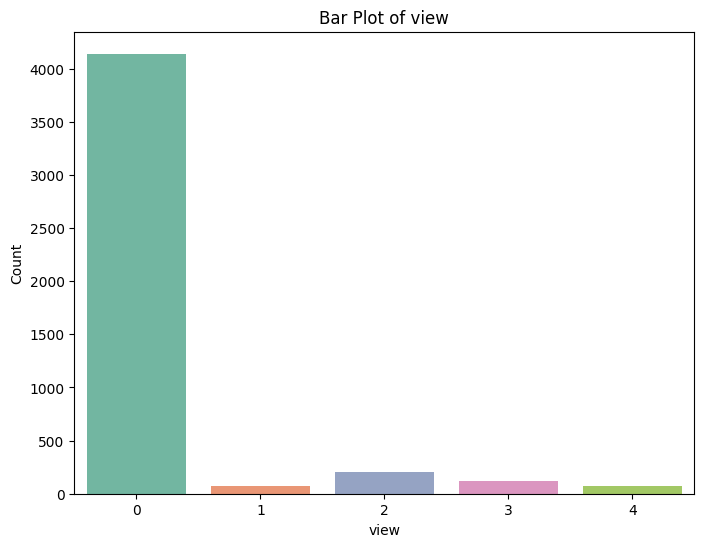

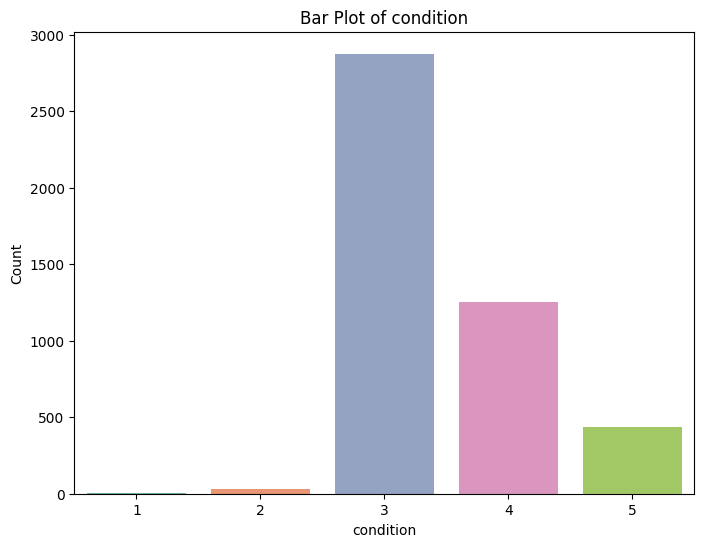

In [12]:
# Bar plots for categorical features
categorical_features = ["waterfront", "view", "condition"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data, palette='Set2')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

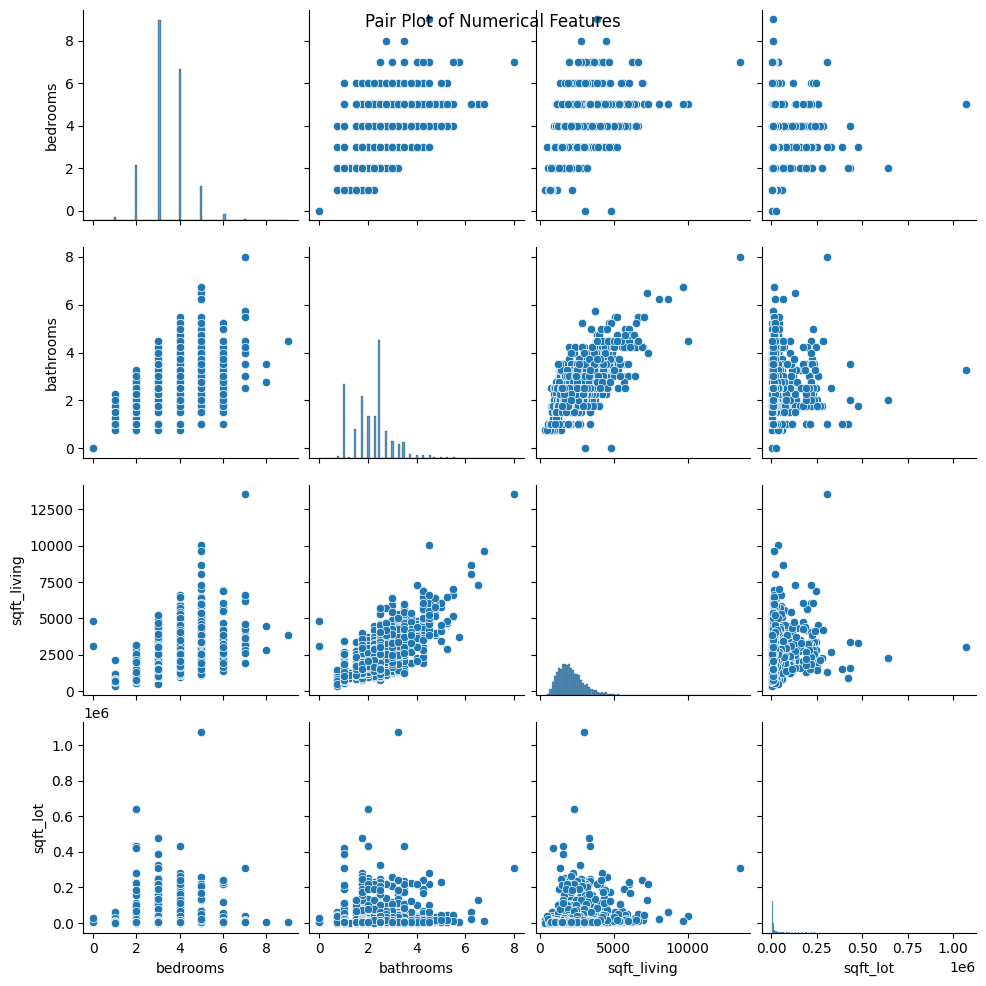

In [13]:
# Pair plot for numerical features
sns.pairplot(data[numerical_features])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

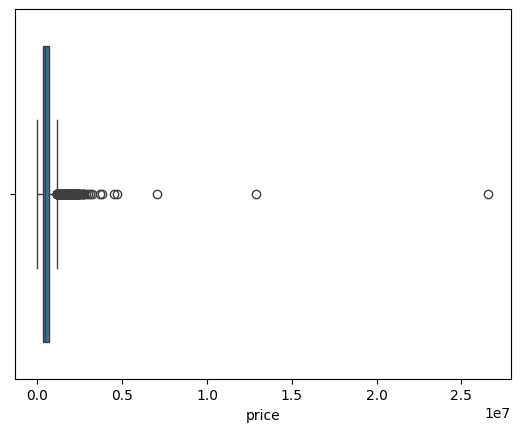

In [14]:
#Visualizing Outlier in the price using boxplot
sns.boxplot(x=data['price'])
plt.show()

### Visualization 
- We have Visualized how the distribution of data in the bedroom, bathroom, sqft_living and sqft_lot.
- To get the better insights or the pattern from data we use pairplot.
- A Heat map is used to show the correlation between different features.
- To Visualize the Outliers the Box plot methodology has been used.

## Step 3: Data Preprocessing

In [15]:
# Checking if any duplicate values are present in the dataset
data.duplicated().any()

False

In [16]:
df1 = data.copy()

In [17]:
#Removing the zero prices from the price Column 
df1['price'].replace(0, np.NaN ,inplace=True)

In [18]:
#Checking the total number of NaN values after replacing them with 0.
df1.isnull().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [19]:
#Checking Shape of Dataframe before droping the NaN rows
df1.shape

(4600, 18)

In [20]:
#droping the NaN values rows
df1.dropna(inplace=True)

In [21]:
#Checking the shape of droping NaN values
df1.shape

(4551, 18)

In [22]:
# Sorting the dataframe by price in descending order to get the outliers on top
df1 = df1.sort_values(by='price', ascending=False).reset_index()

In [23]:
df1.head()

,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,4350,2014-07-03 00:00:00,26590000.0,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA
1,4346,2014-06-23 00:00:00,12899000.0,3.0,2.50,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
2,2286,2014-06-11 00:00:00,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA
3,2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
4,2761,2014-06-18 00:00:00,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA


In [24]:
# Droping the top 3 rows having outlier values in it
df1 = df1[3:].reset_index(drop=True)

In [25]:
#Checking for the updated dataframe
df1.head()

,index,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
1,2761,2014-06-18 00:00:00,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA
2,3729,2014-07-01 00:00:00,3800000.0,5.0,5.50,7050,42840,1.0,0,2,4,4320,2730,1978,2000,1365 91st Ave NE,Clyde Hill,WA 98004,USA
3,1637,2014-05-30 00:00:00,3710000.0,4.0,3.50,5550,28078,2.0,0,2,4,3350,2200,2000,0,3222 78th Pl NE,Medina,WA 98039,USA
4,252,2014-05-07 00:00:00,3200000.0,7.0,4.50,6210,8856,2.5,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA


In [26]:
# Reseting the index number of each row in a dataframe
df1.index = pd.RangeIndex(start=1, stop=len(df1)+1, step=1)

In [27]:
# Droping Index Column in the DataFrame
df1.drop(columns='index', inplace=True)

In [28]:
# Checking the index number in the dataframe
df1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2,2014-06-18 00:00:00,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA
3,2014-07-01 00:00:00,3800000.0,5.0,5.50,7050,42840,1.0,0,2,4,4320,2730,1978,2000,1365 91st Ave NE,Clyde Hill,WA 98004,USA
4,2014-05-30 00:00:00,3710000.0,4.0,3.50,5550,28078,2.0,0,2,4,3350,2200,2000,0,3222 78th Pl NE,Medina,WA 98039,USA
5,2014-05-07 00:00:00,3200000.0,7.0,4.50,6210,8856,2.5,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,2014-05-23 00:00:00,83300.0,3.0,2.00,1370,78408,1.0,0,0,5,1370,0,1964,0,24007 196th Ave SE,Covington,WA 98042,USA
4545,2014-05-20 00:00:00,83300.0,3.0,2.00,1490,7770,1.0,0,0,4,1490,0,1990,0,26017 189th Ave SE,Covington,WA 98042,USA
4546,2014-05-29 00:00:00,83000.0,2.0,1.00,900,8580,1.0,0,0,3,900,0,1918,0,14440 51st Ave S,Tukwila,WA 98168,USA
4547,2014-05-23 00:00:00,80000.0,1.0,0.75,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,WA 98014,USA


### Changes Made
1. As our Dataset did not contain any null value, so we check for the duplicated values.
2. There are no duplicate values are present in our dataset. 
3. So , we check for any 0 values present in the Target Variable.
4. We Found 49 , 0 Values present in price(Target Variable).
5. Now we  replace all the 0 values with a NaN (Not A Number) Value.
6. After Replacing 0's With NaN , we drop all rows which contains NaN values .
4. Now we sorted our Dataframe by selling_price in descending order to get the ouliers on the top.
5. Then we dropped the top 3 rows containing the highest prices as they are most likely outliers.
6. The final dataset now has 4548 rows and 18 Features

## Step 4: One Hot Encoding 

In [29]:
df1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [30]:
# Selecting the categorical columns for Frequency encoding
columns_encoded = ['city']

In [31]:
# Calculate frequency of each category in the 'city' column
city_frequency = df1['city'].value_counts(normalize=True)

In [32]:
# Map the frequency values to the 'city' column
df1['city_encoded'] = df1['city'].map(city_frequency)

In [33]:
# Display the first few rows of the DataFrame with the encoded 'city' feature
print(df1[['city', 'city_encoded']].head())

            city  city_encoded
1  Mercer Island      0.018030
2       Bellevue      0.061566
3     Clyde Hill      0.001979
4         Medina      0.002419
5        Seattle      0.343008


In [34]:
df1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'city_encoded'],
      dtype='object')

In [35]:
#Droping city column from the Data
df1.drop(columns='city',axis=1,inplace=True)

In [36]:
#Checking if the city column is droped.
df1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'statezip',
       'country', 'city_encoded'],
      dtype='object')

In [37]:
#Checking the final Shape of the Dataset
df1.shape

(4548, 18)

In [38]:
df1.to_csv('data_Encoded.csv', index=False)

### Necessary Changes Made
1. As Our DataSet had Categorical Features in it , We used Frequency Encoding to encode Categorical Features.
2. We Used Frequency Encoding Because It Is More Suitable For Machine Learning Algorithms To Work With Categorical Data.
3. And as our data in the categorical column is not cardinal an not aligning with ordinal, we need to convert it using Frequency Encoding.

## Step 5: Data Modelling

In [39]:
# Selecting Features for training and testing
X = df1.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17]].values
Y = df1.iloc[:, 1].values

In [40]:
# Splitting X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [41]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3638, 13)
X_test shape: (910, 13)
Y_train shape: (3638,)
Y_test shape: (910,)


### Random Forest Regression Model

In [62]:
# Random Forest Model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [63]:
# Fit the model for training data
random_forest.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [44]:
# Make prediction on the test data
rand_pred = random_forest.predict(X_test)  

### Gradient Boosting Model

In [45]:
# Initializing the Gradient Boosting Regressor
gradient_boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [46]:
# Fitting the training data in the model
gradient_boost.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [47]:
# Making predictions on the test data
grad_pred = gradient_boost.predict(X_test)

### Support Vector Regressor Machine Model

In [48]:
# Initializing the Support Vector Regressor
svr_model = SVR(C=1.0, epsilon=0.2)

In [49]:
# Fitting the model on the training data
svr_model.fit(X_train, Y_train)

SVR(epsilon=0.2)

In [50]:
# Make predictions on the test data
svr_pred = svr_model.predict(X_test)

### Linear Regression Model

In [51]:
# Initialize the Linear Regression model
linear_regression = LinearRegression()

In [52]:
# Fit the model on the training data
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [53]:
# Make predictions on the test data
lr_pred = linear_regression.predict(X_test)

### Model Used for the House Price Prediction
#### 1. We First used train and test splitting for  our dataset to divide it into two parts, training  set and testing set. The ratio of split was 8:2 
#### 2. Random Forest Regression :
Random Forest Regression is an Ensemble Method that used Multiple Descision Trees and Averages their Result. The Model is Robust to OverFitting and can handle a large number of Features, making it a good choice for complex data.
#### 3. Gradient Boosting Regression :
Gradient Boosting is Another Ensemble Method that builsds multiple weak prediction models, typically descision trees, in a stage-wise fashion. It is known for its Efficiency and Accuracy.
#### 4. Support Vector Regression (SVR) :
Support Vector Regression(SVR) uses the priciple of Support Vector Machines (SVM), But for Regression Problems. It tries to fit best line within a threshold value. It can be effective when the data has multiple features with complex relationship.
#### 5. Linear Regression :
Despite its simplicity, linear regression can serve as a baseline model for price prediction. It assumes a linear relationship between the independent variables and the target variable. It can provide a quick and easy way to understand the influence of each feature on the house prices.


## Step 6: Model Evaluation 

In [54]:
# Calculating Mean Squared Error (MSE) for random forest Regression 
rf_mse = mean_squared_error(Y_test, rand_pred)
print(f"Mean Sqaured Error(MSE) for Random Forest Regression: {rf_mse: .2f}\n")

# Calculate Mean Squared Error (MSE) for Gradient Boosting Regression
gb_mse = mean_squared_error(Y_test, grad_pred)
print(f"Mean Squared Error(MSE) for Gradient Boosting Regression: {gb_mse: .2f}\n")

# Calculate Mean Squared Error (MSE) for Support Vector Regression 
svr_mse = mean_squared_error(Y_test, svr_pred)
print(f"Mean Squared Error(MSE) for Support Vector Regression: {svr_mse: .2f}\n")

# Calculate Mean Squared Error (MSE) for Linear Regression
lr_mse = mean_squared_error(Y_test, lr_pred)
print(f"Mean Squared Error(MSE) for Linear Regression: {lr_mse: .2f}")

Mean Sqaured Error(MSE) for Random Forest Regression:  37812762661.09

Mean Squared Error(MSE) for Gradient Boosting Regression:  37378208467.92

Mean Squared Error(MSE) for Support Vector Regression:  130788873521.09

Mean Squared Error(MSE) for Linear Regression:  50743600282.16


In [55]:
# Calculating R-Squared Score for Random Forest Regression 
rf_r2 = r2_score(Y_test, rand_pred)
print(f"R-Squared Score for Random Forest Regression: {rf_r2: .2f}\n")

# Calculating R-Squared Score for Gradient Boosting Regression 
gb_r2 = r2_score(Y_test, grad_pred)
print(f"R-Squared Score for Gradient Boosting Regression: {gb_r2: .2f}\n")

# Calculating R-Squared Score for Support Vector Regression
svr_r2 = r2_score(Y_test, svr_pred)
print(f"R-Squared Score for Support Vector Regression: {svr_r2: .2f}\n")

# Calculating R-Squared Score for Linear Regression
lr_r2 = r2_score(Y_test, lr_pred)
print(f"R-Squared Score for Linear Regression {lr_r2: .2f}")

R-Squared Score for Random Forest Regression:  0.69

R-Squared Score for Gradient Boosting Regression:  0.69

R-Squared Score for Support Vector Regression: -0.07

R-Squared Score for Linear Regression  0.59


In [56]:
# Calculating Root Mean Squared Error (RMSE) for random forest Regression 
rf_rmse = mean_squared_error(Y_test, rand_pred, squared=False)
print(f"Root Mean Sqaured Error(RMSE) for Random Forest Regression: {rf_rmse: .2f}\n")

# Calculating Root Mean Squared Error (RMSE) for Gradient Boosting Regression
gb_rmse = mean_squared_error(Y_test, grad_pred, squared=False)
print(f"Root Mean Squared Error(RMSE) for Gradient Boosting Regression: {gb_rmse: .2f}\n")

# Calculating Root Mean Squared Error (RMSE) for Support Vector Regression 
svr_rmse = mean_squared_error(Y_test, svr_pred, squared=False)
print(f"Root Mean Squared Error(RMSE) for Support Vector Regression: {svr_rmse: .2f}\n")

# Calculating Root Mean Squared Error (RMSE) for Linear Regression
lr_rmse = mean_squared_error(Y_test, lr_pred, squared=False)
print(f"Root Mean Squared Error(RMSE) for Linear Regression: {lr_rmse: .2f}")

Root Mean Sqaured Error(RMSE) for Random Forest Regression:  194455.04

Root Mean Squared Error(RMSE) for Gradient Boosting Regression:  193334.45

Root Mean Squared Error(RMSE) for Support Vector Regression:  361647.44

Root Mean Squared Error(RMSE) for Linear Regression:  225263.40


In [57]:
# Calculating Mean Absolute Error (MAE) for random forest Regression 
rf_mae = mean_absolute_error(Y_test, rand_pred)
print(f"Mean Absolute Error(MAE) for Random Forest Regression: {rf_mae: .2f}\n")

# Calculating Mean Absolute Error (MAE) for Gradient Boosting Regression
gb_mae = mean_absolute_error(Y_test, grad_pred)
print(f"Mean Absolute Error(MAE) for Gradient Boosting Regression: {gb_mae: .2f}\n")

# Calculating Mean Absolute Error (MAE) for Support Vector Regression 
svr_mae = mean_absolute_error(Y_test, svr_pred)
print(f"Mean Absolute Error(MAE) for Support Vector Regression: {svr_mae: .2f}\n")

# Calculating Mean Absolute Error (MAE) for Linear Regression
lr_mae = mean_absolute_error(Y_test, lr_pred)
print(f"Mean Absolute Error(MAE) for Linear Regression: {lr_mae: .2f}")

Mean Absolute Error(MAE) for Random Forest Regression:  115069.60

Mean Absolute Error(MAE) for Gradient Boosting Regression:  118000.18

Mean Absolute Error(MAE) for Support Vector Regression:  234100.89

Mean Absolute Error(MAE) for Linear Regression:  150101.01


In [58]:
# Calculating Mean Absolute Percentage Error (MAPE) for Random Forest Regression 
rf_mape = mean_absolute_percentage_error (Y_test, rand_pred)
print(f"Mean Absolute Percentage Error(MAPE) for Random Forest Regression: {rf_mape: .2f}% \n")

# Calculating Mean Absolute Percentage Error (MAPE) for Gradient Boosting Regression
gb_mape = mean_absolute_percentage_error(Y_test, grad_pred)
print(f"Mean Absolute Percentage Error(MAPE) for Gradient Boosting Regression: {gb_mape: .2f}% \n")

# Calculating Mean Absolute Percentage Error (MAPE) for Support Vector Regression 
svr_mape = mean_absolute_percentage_error(Y_test, svr_pred)
print(f"Mean Absolute Percentage Error(MAPE) for Support Vector Regression: {svr_mape: .2f}% \n")

# Calculating Mean Absolute Percentage Error (MAPE) for Linear Regression
lr_mape = mean_absolute_percentage_error(Y_test, lr_pred)
print(f"Mean Absolute Percentage Error(MAPE) for Linear Regression: {lr_mape: .2f}%")

Mean Absolute Percentage Error(MAPE) for Random Forest Regression:  0.24% 

Mean Absolute Percentage Error(MAPE) for Gradient Boosting Regression:  0.26% 

Mean Absolute Percentage Error(MAPE) for Support Vector Regression:  0.52% 

Mean Absolute Percentage Error(MAPE) for Linear Regression:  0.31%


## Step 7: Model Selection

- From the Above Evaluation Metrics we can see that the Random Forest Regression is more Suitable for this Machine Learning Problem.
- Because the MSE, RMSE and R2 are all based on squared differences between actual and predicted values, they measure the average squared difference which makes them suitable for regression problems. 
- In the Above Evaluation we can see that Random Forest Regression Models has the best performance in MSE, R2, RMSE, MAE, MAPE.
- From This we can conclude that the Random Forest model is best suitable for this dataset.

### Conclusion :

### The Random Forest Model is Selected for this Regression Problem.

In [59]:
%pip install scikit-learn==1.2.1